

Introduction

For this project, you will act as a data researcher for the World Health Organization. You will investigate if there is a strong correlation between the economic output of a country and the life expectancy of its citizens.

During this project, you will analyze, prepare, and plot data, and seek to answer questions in a meaningful way.

After you perform analysis, you'll be creating an article with your visualizations to be featured in the fictional "Time Magazine".

Focusing Questions:

    Has life expectancy increased over time in the six nations?
    Has GDP increased over time in the six nations?
    Is there a correlation between GDP and life expectancy of a country?
    What is the average life expectancy in these nations?
    What is the distribution of that life expectancy?

GDP Source:World Bank national accounts data, and OECD National Accounts data files.

Life expectancy Data Source: World Health Organization



Step 1. Import Python Modules¶


In [10]:
import pandas as pd

import seaborn as sns

from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.patheffects as path_effects

Step 2 Prep The Data

To look for connections between GDP and life expectancy you will need to load the datasets into DataFrames so that they can be visualized.

Load all_data.csv into a DataFrame called df. Then, quickly inspect the DataFrame using .head().
. Then, I quickly inspect the DataFrame using .head().Load all_data.csv into a DataFrame called df. Then, I quickly inspect the DataFrame using .head().

In [5]:
df = pd.read_csv('all_data.csv')
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


I rename the third Column of the DataFrame using pandas so that it is easier to use within the Python code.

In [12]:
df = pd.read_csv('all_data.csv')
df.head()



,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


Step 3 Examine The Data¶

The datasets are large and it may be easier to view the entire dataset locally on your computer. You can open the CSV files directly from the folder you downloaded for this project.

Let's learn more about our data:

    GDP stands for Gross Domestic Product. GDP is a monetary measure of the market value of all final goods and services produced in a time period.
    The GDP values are in current US dollars.

What six countries are represented in the data?


In [13]:
print(df.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']




What years are represented in the data?


In [14]:
print(df.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]



Step 4 Tweak The DataFrame

Look at the column names of the DataFrame df using .head().


In [16]:
df.head()


,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10




What do you notice? The first two column names are one word each, and the third is five words long! Life expectancy at birth (years) is descriptive, which will be good for labeling the axis, but a little difficult to wrangle for coding the plot itself.

Revise The DataFrame Part A:

Use Pandas to change the name of the last column to LEABY. </font>


In [17]:
df = df.rename(columns={'Life expectancy at birth (years)': 'LEABY'})



Run df.head() again to check your new column name worked.


In [18]:
df.head()

,Country,Year,LEABY,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10



Step 5 Bar Charts To Compare Average

To take a first high level look at both datasets, create a bar chart for each DataFrame:

A) Create a bar chart from the data in df using Country on the x-axis and GDP on the y-axis.




Average GDP chart


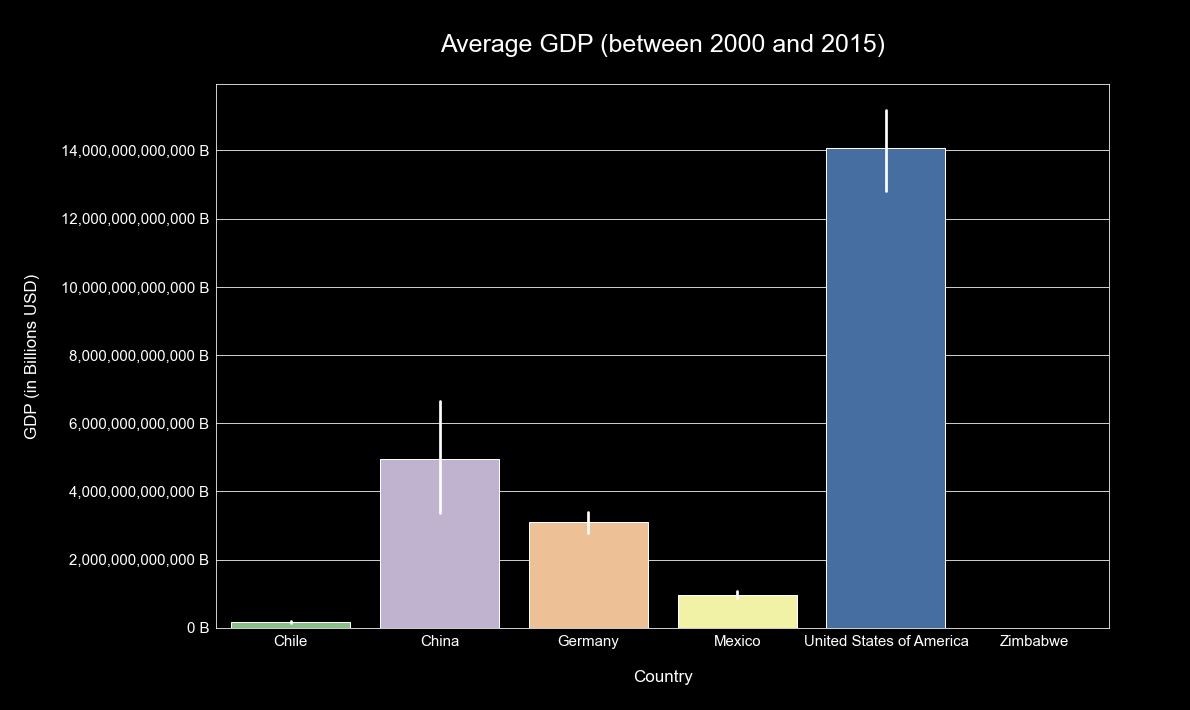

In [21]:
# Set color palette
sns.set_palette('Accent')

# Set style
sns.set_style('darkgrid', {'axes.facecolor':'black', 'figure.facecolor':'black'})

# Create figure
plt.figure(figsize=(16, 10))

# Use Seaborn to create the bar plot
ax = sns.barplot(data=df, x='Country', y='GDP', errcolor='white')

# Add a title
ax.set_title('\nAverage GDP (between 2000 and 2015)\n', fontsize=25, color='white')

# Label x and y axises
ax.set_xlabel('\nCountry\n', fontsize=17, color='white')
ax.set_ylabel('\nGDP (in Billions USD)\n', fontsize=17, color='white')

# Ticks
ax.tick_params(axis='both', colors='white', labelsize=15)
# Add billion unit
fmt = '{x:,.0f} B'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

# place an empty text box in upper left axes coords, to match to the figure right padding  
ax.text(1.08, 1, ' ', transform=ax.transAxes, bbox=dict(facecolor='black', edgecolor='black'))

# Note: save figure before using show(), if not the result is a blank image
# also savefig overrides the facecolor for the background of the figure, need to save fg with .get_facecolor() 
plt.savefig('avg_gdp_barchart.png', facecolor=ax.get_facecolor())
plt.show()

# Restore all RC params to default settings
sns.reset_defaults()
plt.close()



Seaborn automatically displayed the average GDP per country between the years 2000 and 2015.

In [25]:


# Countries average GDP
df_avg_period_15y_GDP = pd.DataFrame({'GDP_avg': df.groupby('Country')['GDP'].mean()}).reset_index()

df_avg_period_15y_GDP.to_csv(' avg_period_15y_GDP.csv')

print('\nContries average GDPs, in the 15 years period 2000-20015:\n')

df_avg_period_15y_GDP.sort_values(by= 'GDP_avg', ascending=False).reset_index(drop=True).head(6)


Contries average GDPs, in the 15 years period 2000-20015:



,Country,GDP_avg
0,United States of America,1.407500e+13
1,China,4.957714e+12
2,Germany,3.094776e+12
3,Mexico,9.766506e+11
4,Chile,1.697888e+11
5,Zimbabwe,9.062580e+09


In [27]:
# Zimbawe dataframe
df_zimbabwe = df.loc[df.Country == 'Zimbabwe'].drop(columns=['Country']).reset_index(drop=True)
df_zimbabwe.to_csv('zimbabwe_data.csv')
df_zimbabwe.head(16)

,Year,LEABY,GDP
0,2000,46.0,6.689958e+09
1,2001,45.3,6.777385e+09
2,2002,44.8,6.342116e+09
3,2003,44.5,5.727592e+09
4,2004,44.3,5.805598e+09
5,2005,44.6,5.755215e+09
6,2006,45.4,5.443896e+09
7,2007,46.6,5.291950e+09
8,2008,48.2,4.415703e+09
9,2009,50.0,8.621574e+09




Visualizing Zimbabwe GDP by years, line graph.


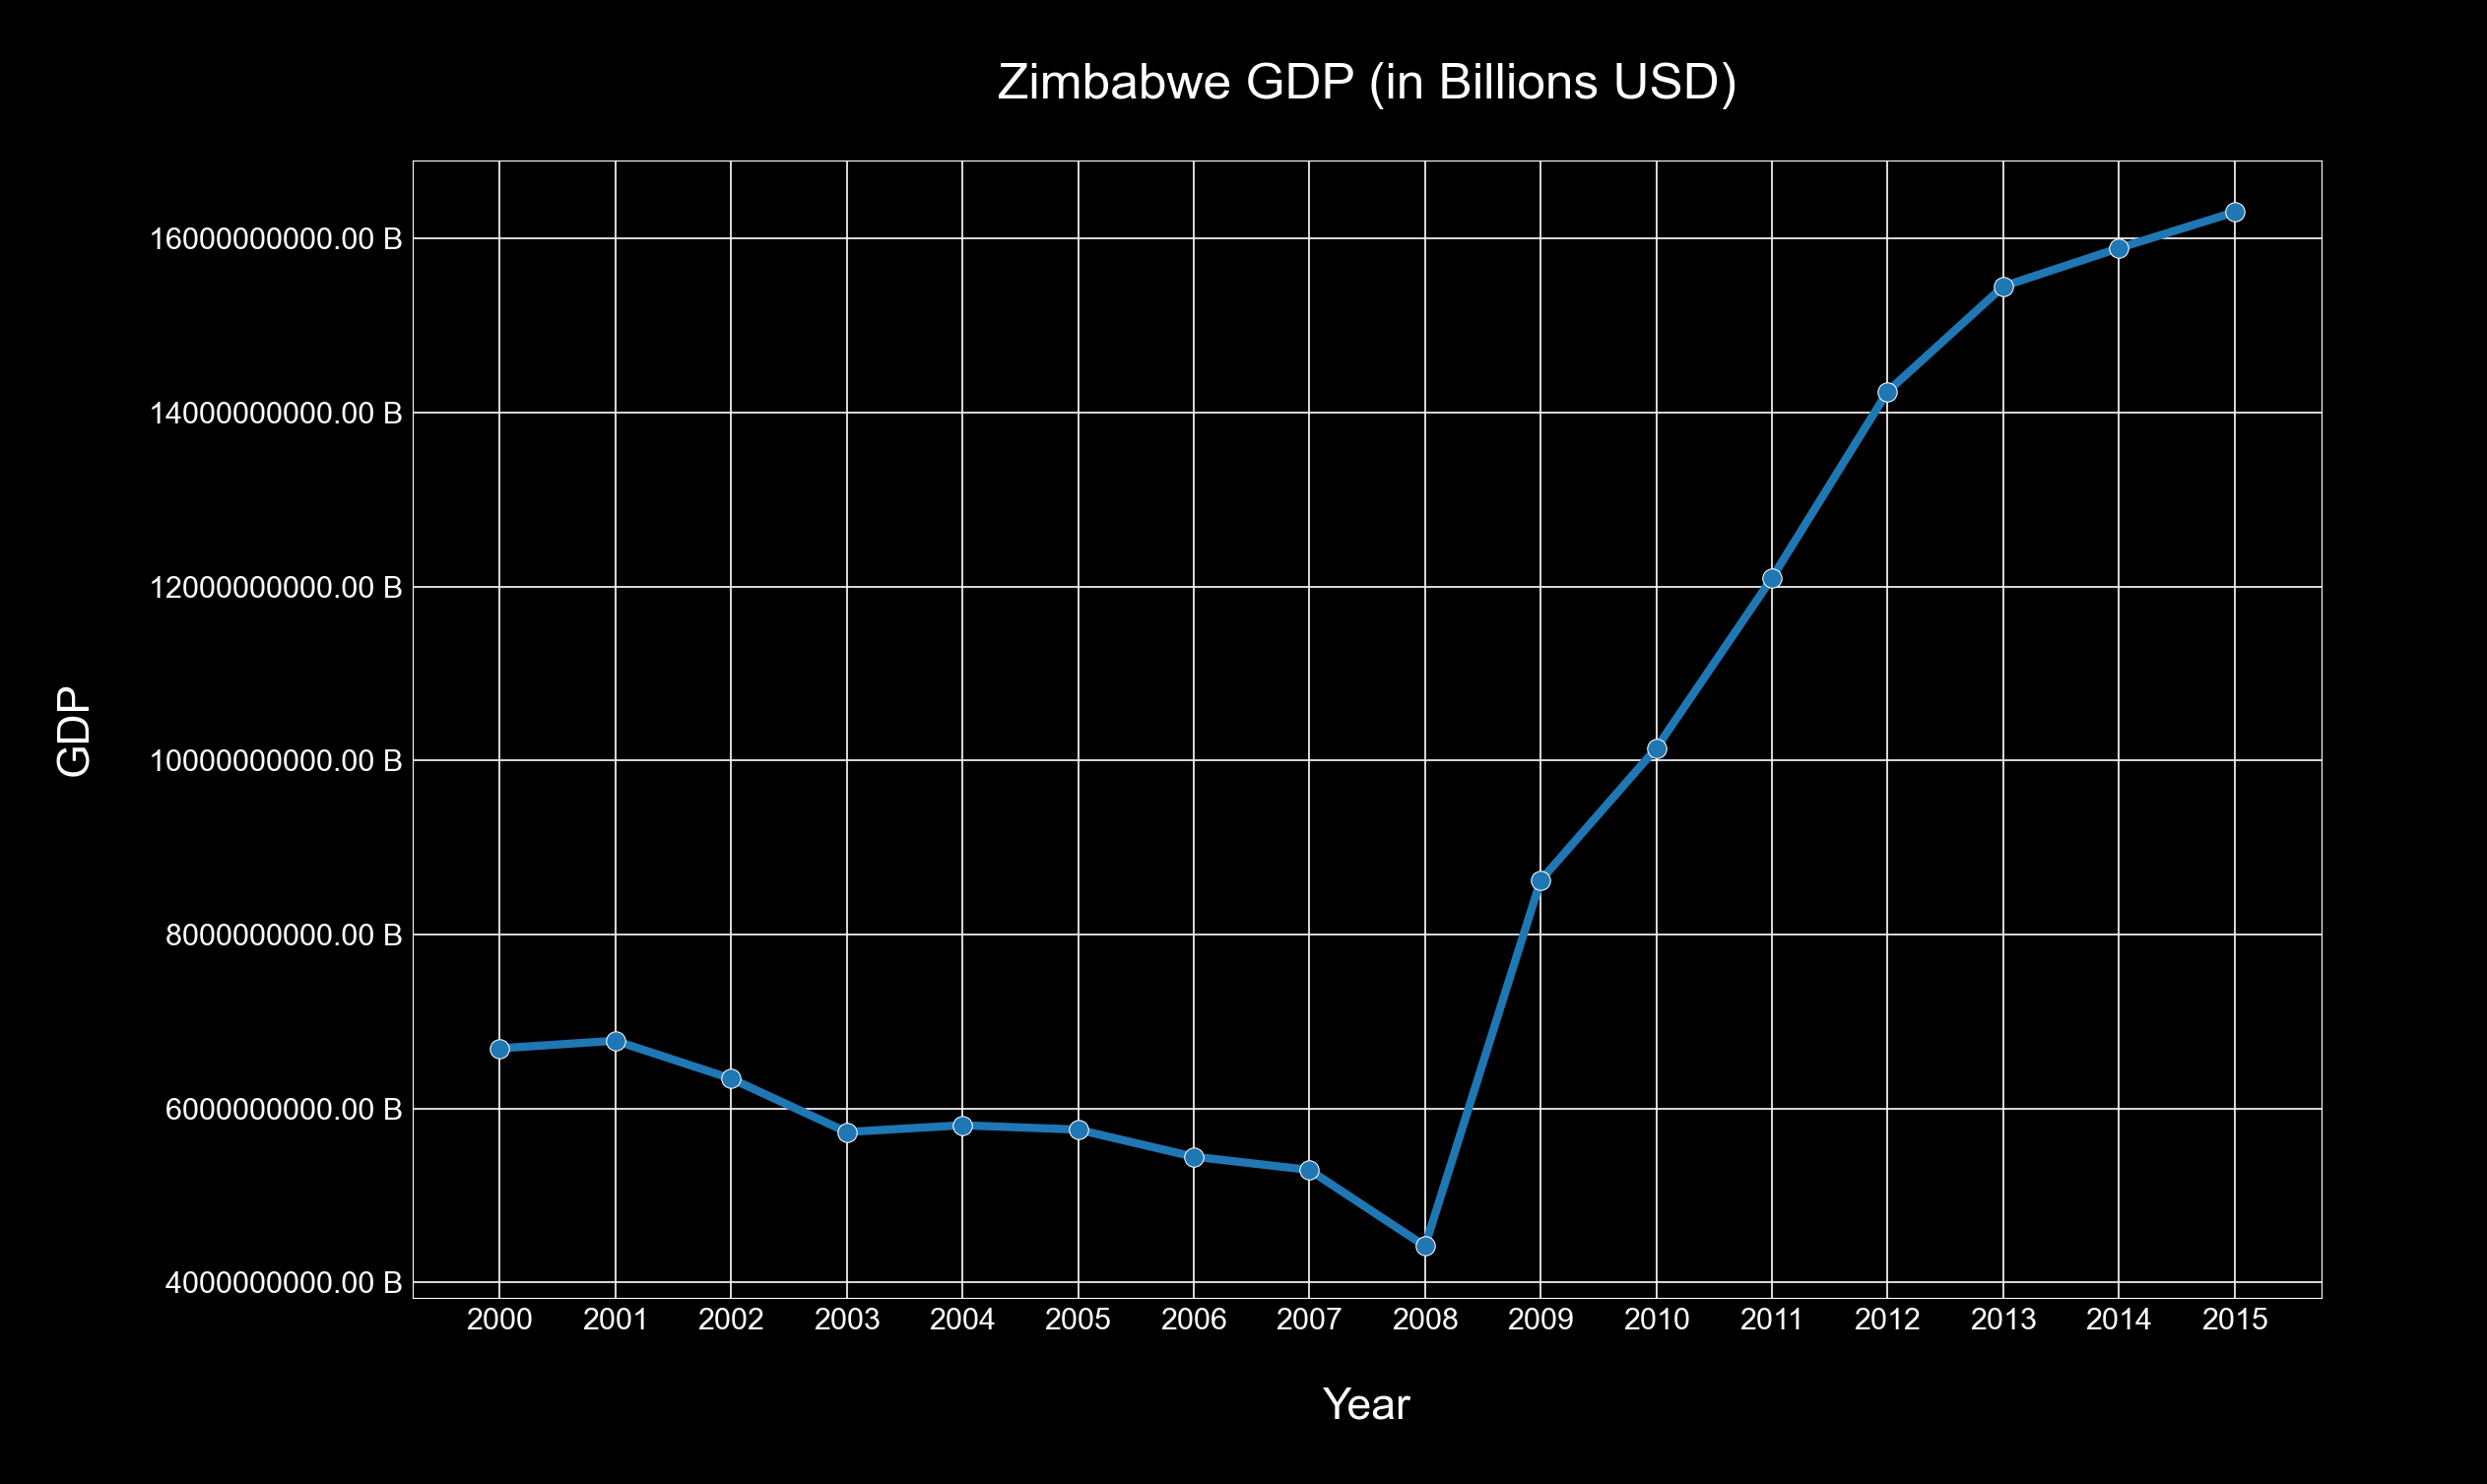

In [29]:
# Set style
sns.set_style('darkgrid', {'axes.facecolor':'black', 'figure.facecolor':'black'})

# Create figure 
plt.figure(figsize=(25, 15))

# Use Seaborn to create the bar plot
sns.set_context(rc={'grid.linewidth': 1.2, 'lines.linewidth': 6, 'lines.markersize': 14})
ax = sns.lineplot(data=df_zimbabwe, x='Year', y='GDP', marker='o', 
                   
                  ci=None)

# Setting ticks
# ax = sns.lineplot(x='YEAR') displays every other year, formated x ticks to display every year
ax.set_xticks(df_zimbabwe.Year)
ax.tick_params(axis='both', colors='white', labelsize=22)
# Add billion unit
fmt = "{x:.2f} B"
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

# Add a title (using Matplotlib)
ax.set_title('\nZimbabwe GDP (in Billions USD)\n', fontsize=37, color='white')

# Label x and y axises (using Matplotlib)
ax.set_xlabel('\nYear\n', fontsize=32, color='white')
ax.set_ylabel('\nGDP\n', fontsize=32, color='white')

# place an empty text box in the upper left axes coords, to match to the figure right padding  
ax.text(1.08, 1, ' ', transform=ax.transAxes, bbox=dict(facecolor='black', edgecolor='black'))

# Note: save figure before using show(), if not the result is a blank image
# also savefig overrides the facecolor for the background of the figure, need to save fg with .get_facecolor() 
plt.savefig('year_gdp_zimbabwe_linechart.png', facecolor=ax.get_facecolor())
plt.show()

# Restore all RC params to default settings
sns.reset_defaults()
plt.close()



From the year 2000 to the year 2008 add a declining GDP, but between 2008 and 2015 period Zimbabwe GDP grew %269.


In [31]:
# Zimbabwe growth rate in %
zim_gdp_2008 = df_zimbabwe.GDP[df.Year==2008].values
zim_gdp_2015 = df_zimbabwe.GDP[df.Year==2015].values

print('\nZimbabwe GDP between 2008 and 20015 grew:')
print(str(int(((zim_gdp_2015-zim_gdp_2008)/zim_gdp_2008)*100)) + "%\n")


Zimbabwe GDP between 2008 and 20015 grew:
269%





B) Create a bar chart using the data in df with Country on the x-axis and LEABY on the y-axis. Remember to plt.show() your chart!


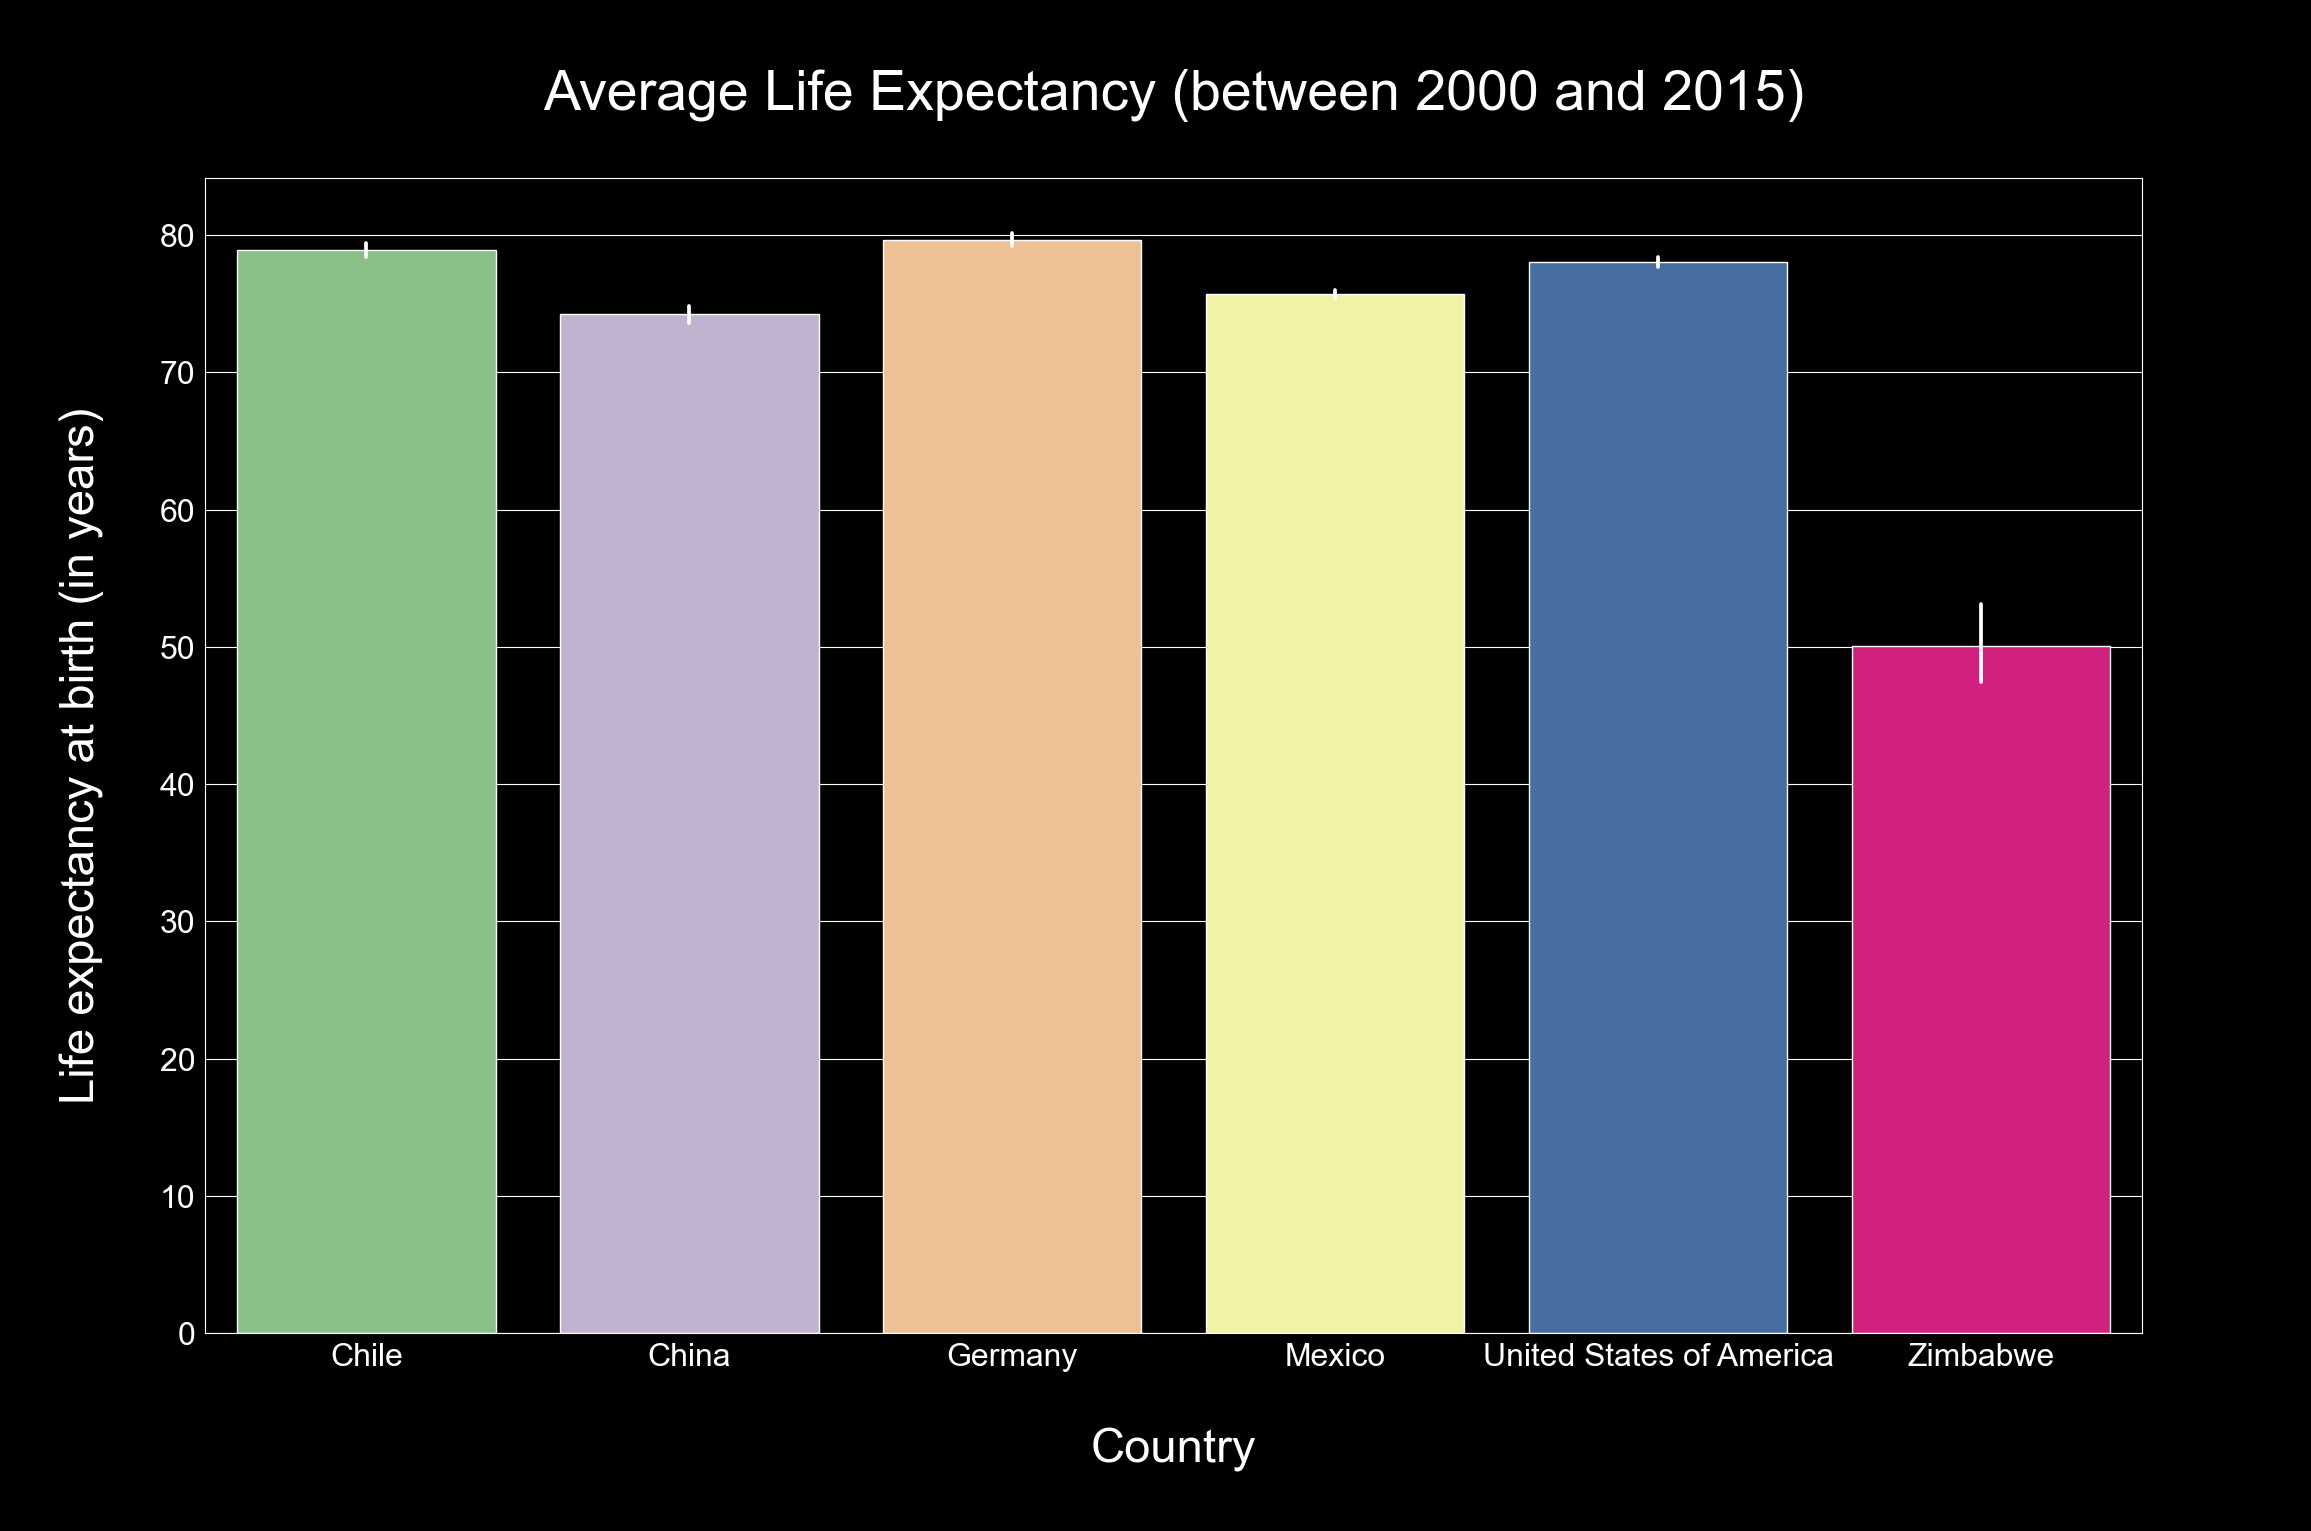

In [32]:
# Set color palette
sns.set_palette('Accent')

# Set style
sns.set_style('darkgrid', {'axes.facecolor':'black', 'figure.facecolor':'black'})

# Create figure 
plt.figure(figsize=(25, 15))

# Use Seaborn to create the bar plot
ax = sns.barplot(data=df, x='Country', y='LEABY', errcolor='white')

# Ticks
ax.tick_params(axis='both', colors='white', labelsize=23)

# Add a title 
ax.set_title('\nAverage Life Expectancy (between 2000 and 2015)\n', fontsize=40, color='white')

# Label x and y axises 
ax.set_xlabel('\nCountry\n', fontsize=34, color='white')
ax.set_ylabel('\nLife expectancy at birth (in years)\n', fontsize=34, color='white')

# place an empty text box in upper left axes coords, to match to the figure right padding  
ax.text(1.08, 1, ' ', transform=ax.transAxes, bbox=dict(facecolor='black', edgecolor='black'))

# Note: save figure before using show(), if not the result is a blank image
# also savefig overrides the facecolor for the background of the figure, need to save fg with .get_facecolor()
plt.savefig('avg_leaby_barchart.png', facecolor=ax.get_facecolor())
plt.show()

# Restore all RC params to default settings
sns.reset_defaults()
plt.close()



What do you notice about the two bar charts? Do they look similar?

The charts are different. When a significant difference in the average GDPs exists between the countries, the countries average LEABY are roughly at 77 years, except for Zimbabwe. Zimbabwe with an average LEABY at 50 years is roughly one third of all other countries and its average GPA when compared to all other countries is insignificant. A visualization of Zimbabwe and the other countries LEABY distributions over the years, will give us a better picture of the countries average LEABY overtime.

## Step 6. Violin Plots To Compare Life Expectancy Distributions

Another way to compare two datasets is to visualize the distributions of each and to look for patterns in the shapes.

What do you notice about this distribution? Which country's life expactancy has changed the most?


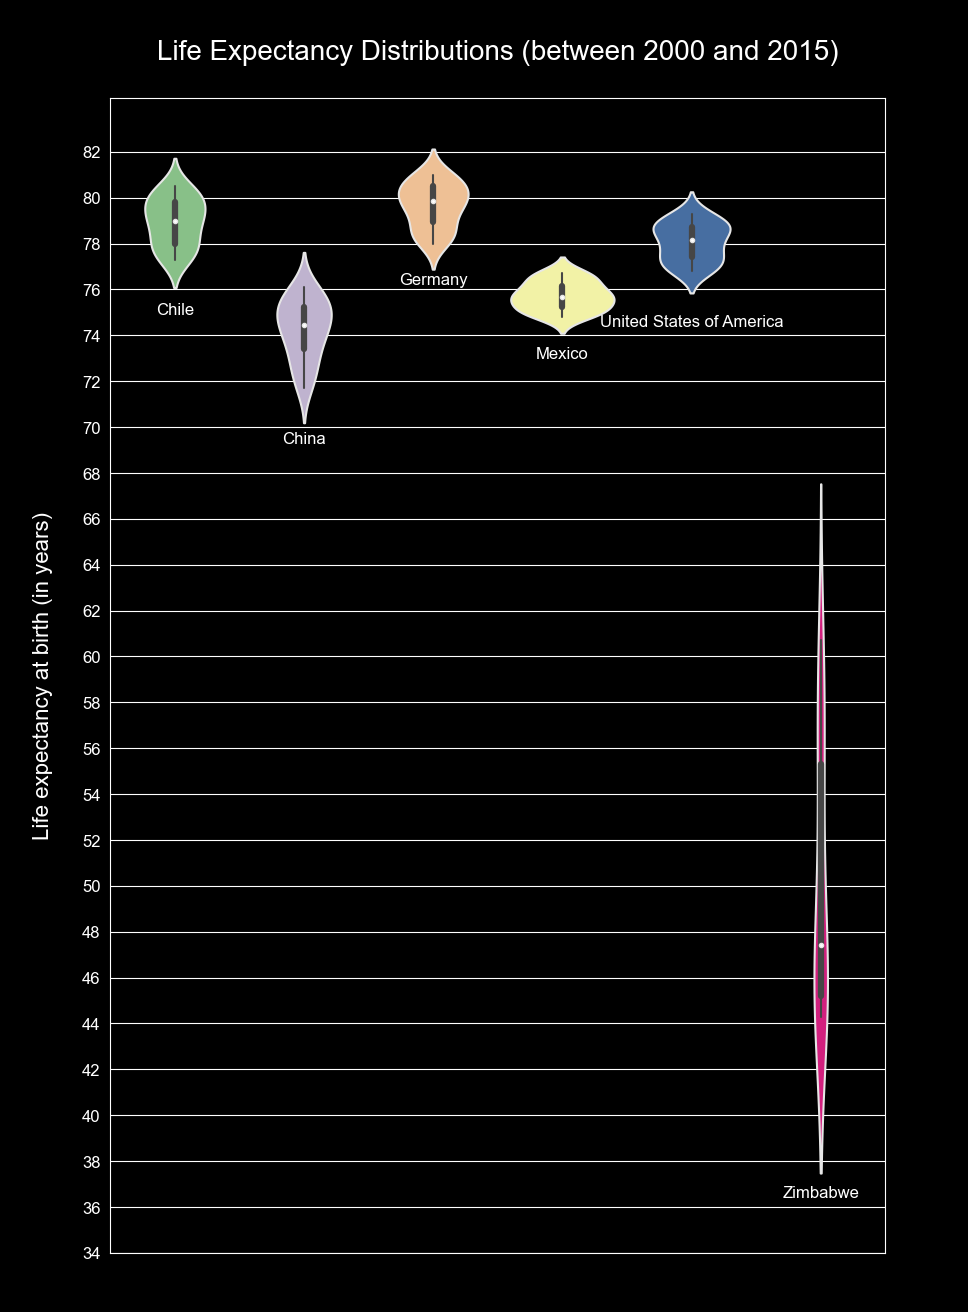

In [35]:
# Set color palette
sns.set_palette('Accent')
# Set style
sns.set_style('darkgrid', {'axes.facecolor':'black', 'figure.facecolor':'black'})

# Create figure and axes
plt.figure(figsize=(10, 15))

# Use Seaborn to create the violin plot
ax = sns.violinplot(data=df, x='Country', y='LEABY')
plt.setp(ax.collections, edgecolor='#e6e6e6')
# Add a title (using Matplotlib)
ax.set_title('\nLife Expectancy Distributions (between 2000 and 2015)\n', fontsize=20, color='white')

# Label x and y axises
ax.set_yticks(range(34, 84, 2))
ax.tick_params(axis='y', colors='white', labelsize=12)
ax.set(xticklabels=[])
ax.set(xlabel=None)
ax.set_ylabel('\nLife expectancy at birth (in years)\n', fontsize=16, color='white')

# --------- Country name text boxes

# Create a countries minimum LEABY values DataFrame, use when setting Country name text boxes y and x locations
df_LEABY_min = pd.DataFrame({'country': df.Country.unique(),
                             'LEABY_min': df.groupby('Country')['LEABY'].min().reset_index(drop=True)})

# plot Country name text boxes
for i in range(len(df_LEABY_min.index)):
    # Assign the y location Country name text box subtractor value for each county
    if df_LEABY_min.country.loc[i] == 'Zimbabwe':
        y_axis_sub = 7.9
    elif df_LEABY_min.country.loc[i] == 'Mexico':
        y_axis_sub = 1.8
    elif df_LEABY_min.country.loc[i] == 'Germany':
        y_axis_sub = 1.8
    else:
        y_axis_sub = 2.4
    # plot Country name text boxes yx locations and style
    ax.text(i, 
            df_LEABY_min.LEABY_min.loc[i] - y_axis_sub,
            df_LEABY_min.country.loc[i],
            ha='center',
            size=12,
            color='white',
            bbox=dict(edgecolor='None', facecolor='None'))

# place an empty text box in upper left axes coords, to match to the figure right padding  
ax.text(1.09, -0.04, ' ', transform=ax.transAxes, bbox=dict(facecolor='black', edgecolor='black'))
    
# Note: save figure before using show(), if not the result is a blank image 
# also savefig overrides the facecolor for the background of the figure, need to save fg with .get_facecolor() 
plt.savefig('distribution_leaby_violinchart.png', facecolor=ax.get_facecolor())
plt.show()

# Restore all RC params to default settings
sns.reset_defaults()
plt.close()



Focus question: "What is the average life expectancy in these nations?"


In [36]:
# Countries average LEAB
df_avg_period_15y_LEABY = pd.DataFrame({'LEABY_avg': df.groupby('Country')['LEABY'].mean()}).reset_index()

df_avg_period_15y_LEABY.to_csv('avg_period_15y_LEABY.csv')

print('\nThe average life expectancy at birth, in the 15 year period 2000-20015:\n')

df_avg_period_15y_LEABY.sort_values(by='LEABY_avg', ascending=False).reset_index(drop=True).head(6)


The average life expectancy at birth, in the 15 year period 2000-20015:



,Country,LEABY_avg
0,Germany,79.65625
1,Chile,78.94375
2,United States of America,78.06250
3,Mexico,75.71875
4,China,74.26250
5,Zimbabwe,50.09375




Focus Question: “What is the distribution of that life expectancy?”

Based on the chart above, Chile and Germany's distribution LEABY (2000-2015) figures are very similar, with Germany having a little denser concentration of LEABY at 80 years, and their averages (2000-2015) LEABY being roughly the same.
Chile LEABY distribution spreads between 76 and 81.5 years compared to Germany with a LEABY distribution spread between 76.9 and 82 years.

The US distribution LEABY (2000-2015) figure is remarkably similar in shape to the Germany distribution LEABY (2000-2015) figure, but with the US having its highest concentration of LEABY at 78.5 years instead of 80 years and with the US having almost no LEABY higher than 80 years. The US average (2000-2015) LEBAY is roughly 1.5 years lower than the Germany average (2000-2015) LEBAY.
The US LEABY distribution spreads between 76 and 81.5 years compared to Germany with a LEABY distribution spread between 76.9 and 80.3 years.

Mexico and China have roughly an average (2000-2015) LEBAY of 74 years and 75.5 years respectively. China has a more broadly distributed LEABY between 70 and 77.5 years, compared to Mexico with a distribution spread between 74 and 77.5 years.
Mexico highest concentration of LEABY is at 75.5 years.

Zimbabwe has the most spread out distribution LEABY (2000-2015) shape, from 37.5 to 67.5 years. It has also the lowest average (2000-2015) LEBAY at 50 years.
Step 7. Bar Plots Of GDP and Life Expectancy over time

We want to compare the GDPs of the countries over time, in order to get a sense of the relationship between GDP and life expectancy.

First, can plot the progession of GDP's over the years by country in a barplot using Seaborn. We have set up a figure with the correct dimensions for your plot. Under that declaration:

Since our GDP is in trillions of US dollars, make sure your Y label reflects that by changing it to "GDP in Trillions of U.S. Dollars".


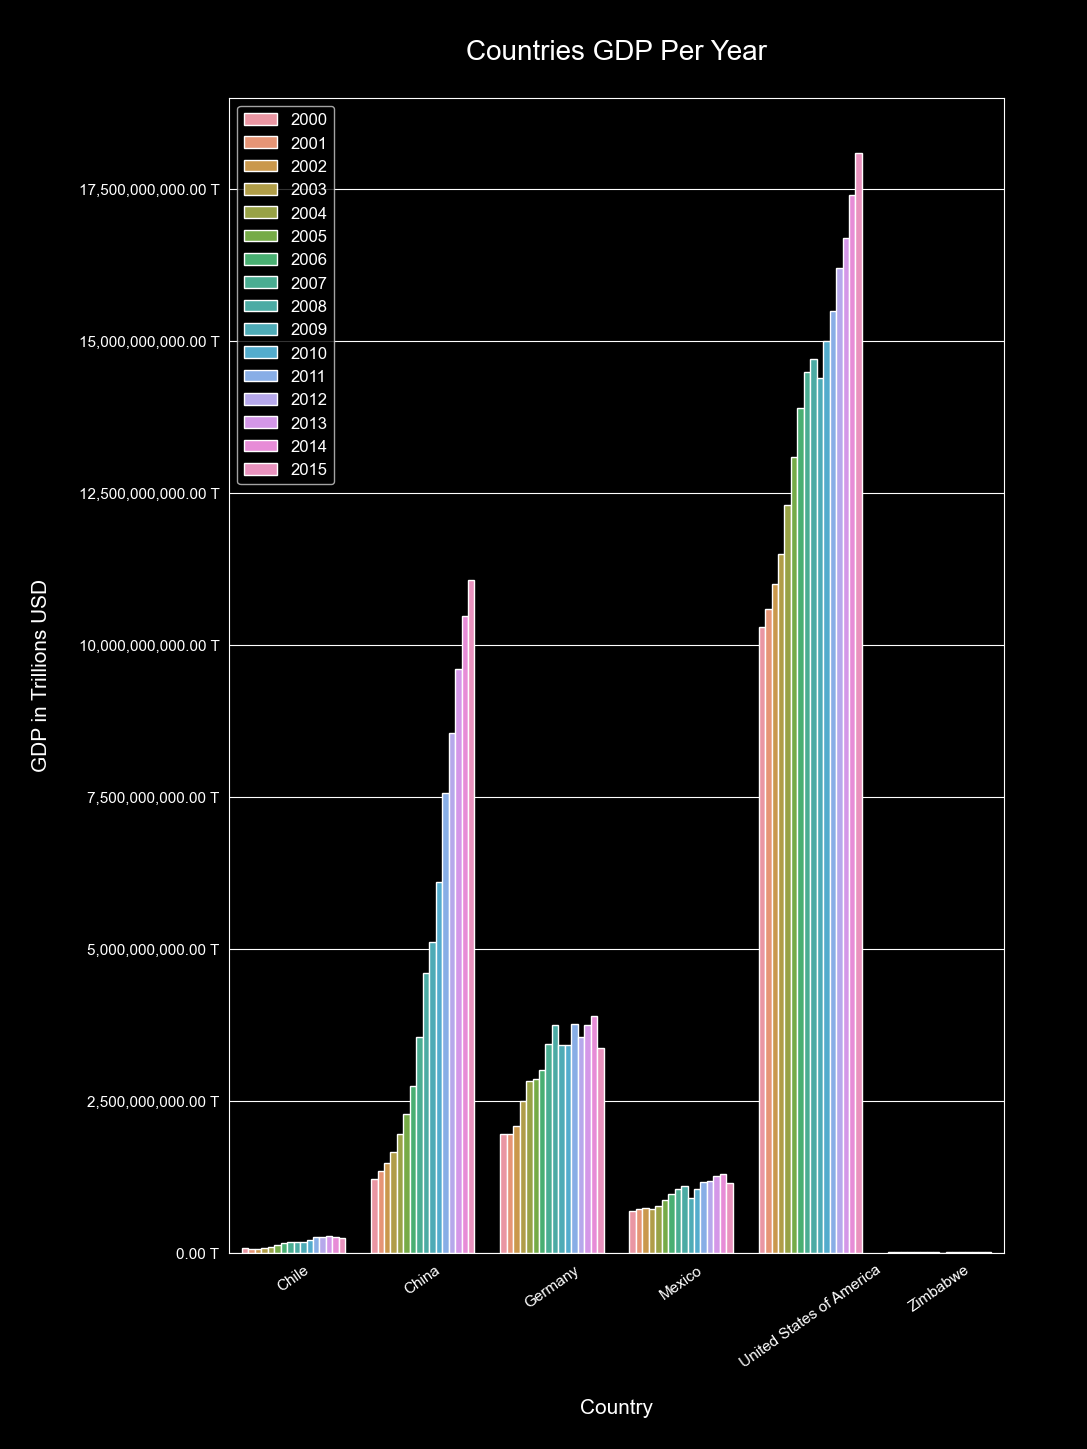

In [37]:
# Set style
sns.set_style('darkgrid', {'axes.facecolor':'black', 'figure.facecolor':'black'})

# Create figure and axes
plt.figure(figsize=(10, 15))


# Use Seaborn to create the bar plot, GDP in Trillions USD
ax = sns.barplot(data=df, x='Country', y=df.GDP*1e-3, hue="Year")

# Add a title 
ax.set_title('\nCountries GDP Per Year\n', fontsize=20, color='white')

# Label x and y axes 
ax.set_xlabel('\nCountry\n', fontsize=15, color='white')
ax.set_ylabel('\nGDP in Trillions USD\n', fontsize=15, color='white')
plt.xticks(rotation=35)

# ticks
ax.tick_params(axis='both', colors='white', labelsize=11)
# Add billion unit
fmt = '{x:,.2f} T'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

# Legend to the left
legend = plt.legend(loc=2, fontsize=12)
plt.setp(legend.get_texts(), color='w')

# place an empty text box in upper left axes coords, to match to the figure right padding  
ax.text(1.09, 1, ' ', transform=ax.transAxes, bbox=dict(facecolor='black', edgecolor='black'))

# Note: save figure before using show(), if not the result is a blank image
# also savefig overrides the facecolor for the background of the figure, need to save fg with .get_facecolor()
plt.savefig('gdp_per_year_barchart.png', facecolor=ax.get_facecolor())
plt.show()

# Restore default settings
sns.reset_defaults()
plt.close()

In [39]:
# countries GDP growth rate (2000-20015) DataFrame
df_gdp_growth_rate = pd.DataFrame({'Country': df.Country.unique(), 
                                   'gdp_2000': df.loc[(df['Year']==2000), 'GDP'].values,
                                   'gdp_2015': df.loc[(df['Year']==2015), 'GDP'].values})
# GDP growth rate per country
df_gdp_growth_rate['growth_rate']= (df_gdp_growth_rate.gdp_2015 - df_gdp_growth_rate.gdp_2000)/df_gdp_growth_rate.gdp_2000

df_gdp_growth_rate.to_csv('gdp_growth_rate.csv')

print('\nCountries GDP growth rate, in the 15 years period 2000-2015')

df_gdp_growth_rate.sort_values(by='growth_rate', ascending=False).reset_index(drop=True).head(6)


Countries GDP growth rate, in the 15 years period 2000-2015


,Country,gdp_2000,gdp_2015,growth_rate
0,China,1.211350e+12,1.106470e+13,8.134189
1,Chile,7.786093e+10,2.425180e+11,2.114758
2,Zimbabwe,6.689958e+09,1.630467e+10,1.437186
3,United States of America,1.030000e+13,1.810000e+13,0.757282
4,Germany,1.949950e+12,3.375610e+12,0.731126
5,Mexico,6.836480e+11,1.152260e+12,0.685458




Focus question: "Has GDP increased over time in the six nations?"

All the countries listed on the chart had a GDP growth between 2000 and 2015.
In the 15 year period 2000-2015, China had a gigantic exponential GDP growth, with a growth rate of 8.13.
In other words, China grew 813% between 2000 and 2015 compared to the US with 75% growth between 2000 and 2015.
Chile had significant 211% growth between 2000 and 2015.
Most countries had their GDP drop in 2009 with the exception of China and Zimbabwe (see Zimbabwe GDP (in Billions USD)).
After 2009 Germany had erratic GDP levels, dropping and rising almost from one year to another, with a significant drop in 2015.

Now that we have plotted a barplot that clusters GDP over time by Country, let's do the same for Life Expectancy.


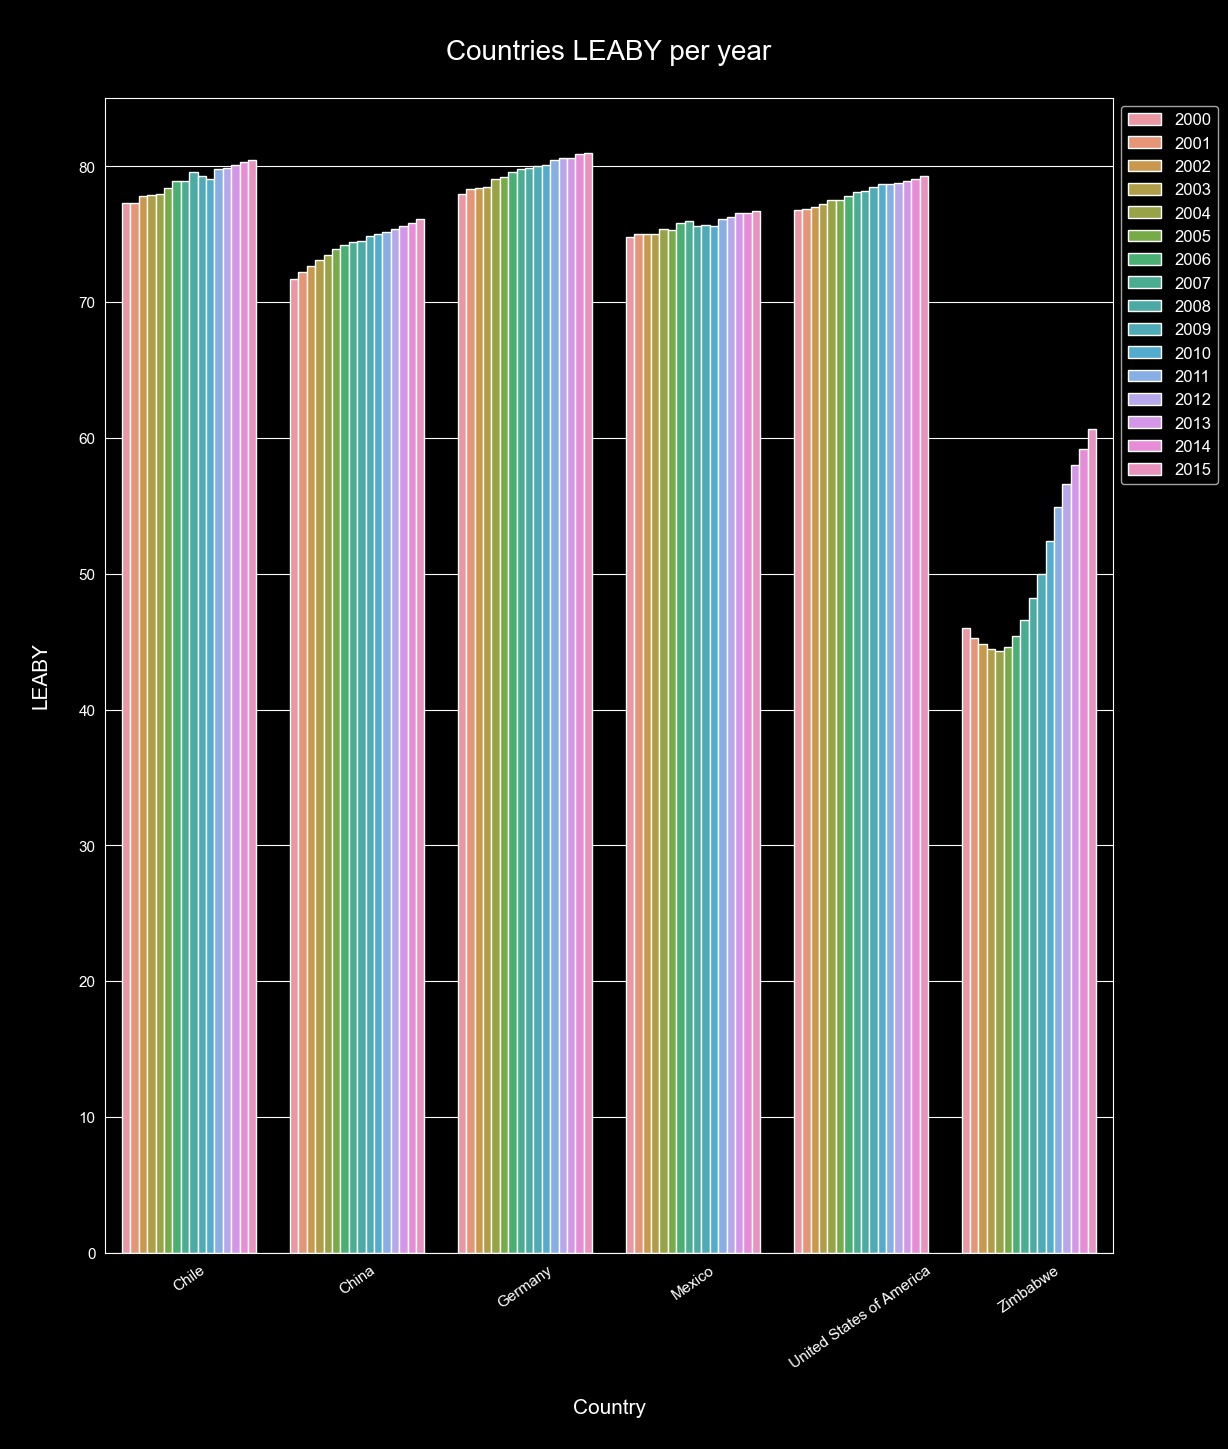

In [40]:
# Set style
sns.set_style('darkgrid', {'axes.facecolor':'black', 'figure.facecolor':'black'})

# Create figure and axes
plt.figure(figsize=(13, 15))


# Use Seaborn to create the bar plot
ax = sns.barplot(data=df, x='Country', y='LEABY', hue="Year")

# Add a title 
ax.set_title('\nCountries LEABY per year\n', fontsize=20, color='white')

# ticks
ax.tick_params(axis='both', colors='white', labelsize=11)
# Label x and y axes 
ax.set_xlabel('\nCountry\n', fontsize=15, color='white')
ax.set_ylabel('\nLEABY\n', fontsize=15, color='white')
plt.xticks(rotation=35)

# Legend to the location
legend = plt.legend(bbox_to_anchor=(1, 1), fontsize=12)
plt.setp(legend.get_texts(), color='w')

# Note: save figure before using show(), if not the result is a blank image
plt.savefig('leaby_per_year_barchart.png', facecolor=ax.get_facecolor())
plt.show()

# Restore to default settings
sns.reset_defaults()
plt.close()

Focus question: "Has life expectancy increased over time in the six nations?"

The LEABY increased over time in all six countries, but Zimbabwe has had the most significant growth of LEABY, with a growth of 32% LEABY between 2000 and 2015. It is important to note that Zimbabwe also experienced a decrease of LEABY between 2000 and 2004.

In [41]:
# countries LEABY growth rate (2000-20015) DataFrame
df_leaby_growth_rate = pd.DataFrame({'Country': df.Country.unique(), 
                                   'leaby_2000': df.loc[(df['Year']==2000), 'LEABY'].values,
                                   'leaby_2015': df.loc[(df['Year']==2015), 'LEABY'].values})
# GDP growth rate per country
df_leaby_growth_rate['growth_rate'] = (df_leaby_growth_rate.leaby_2015 - df_leaby_growth_rate.leaby_2000)/ \
    df_leaby_growth_rate.leaby_2000

df_leaby_growth_rate.to_csv('leaby_growth_rate.csv')

print('\nCountries LEABY growth rate, in the 15 year period 2000-2015')

df_leaby_growth_rate.sort_values(by='growth_rate', ascending=False).reset_index(drop=True).head(6)


Countries LEABY growth rate, in the 15 year period 2000-2015


,Country,leaby_2000,leaby_2015,growth_rate
0,Zimbabwe,46.0,60.7,0.319565
1,China,71.7,76.1,0.061367
2,Chile,77.3,80.5,0.041397
3,Germany,78.0,81.0,0.038462
4,United States of America,76.8,79.3,0.032552
5,Mexico,74.8,76.7,0.025401


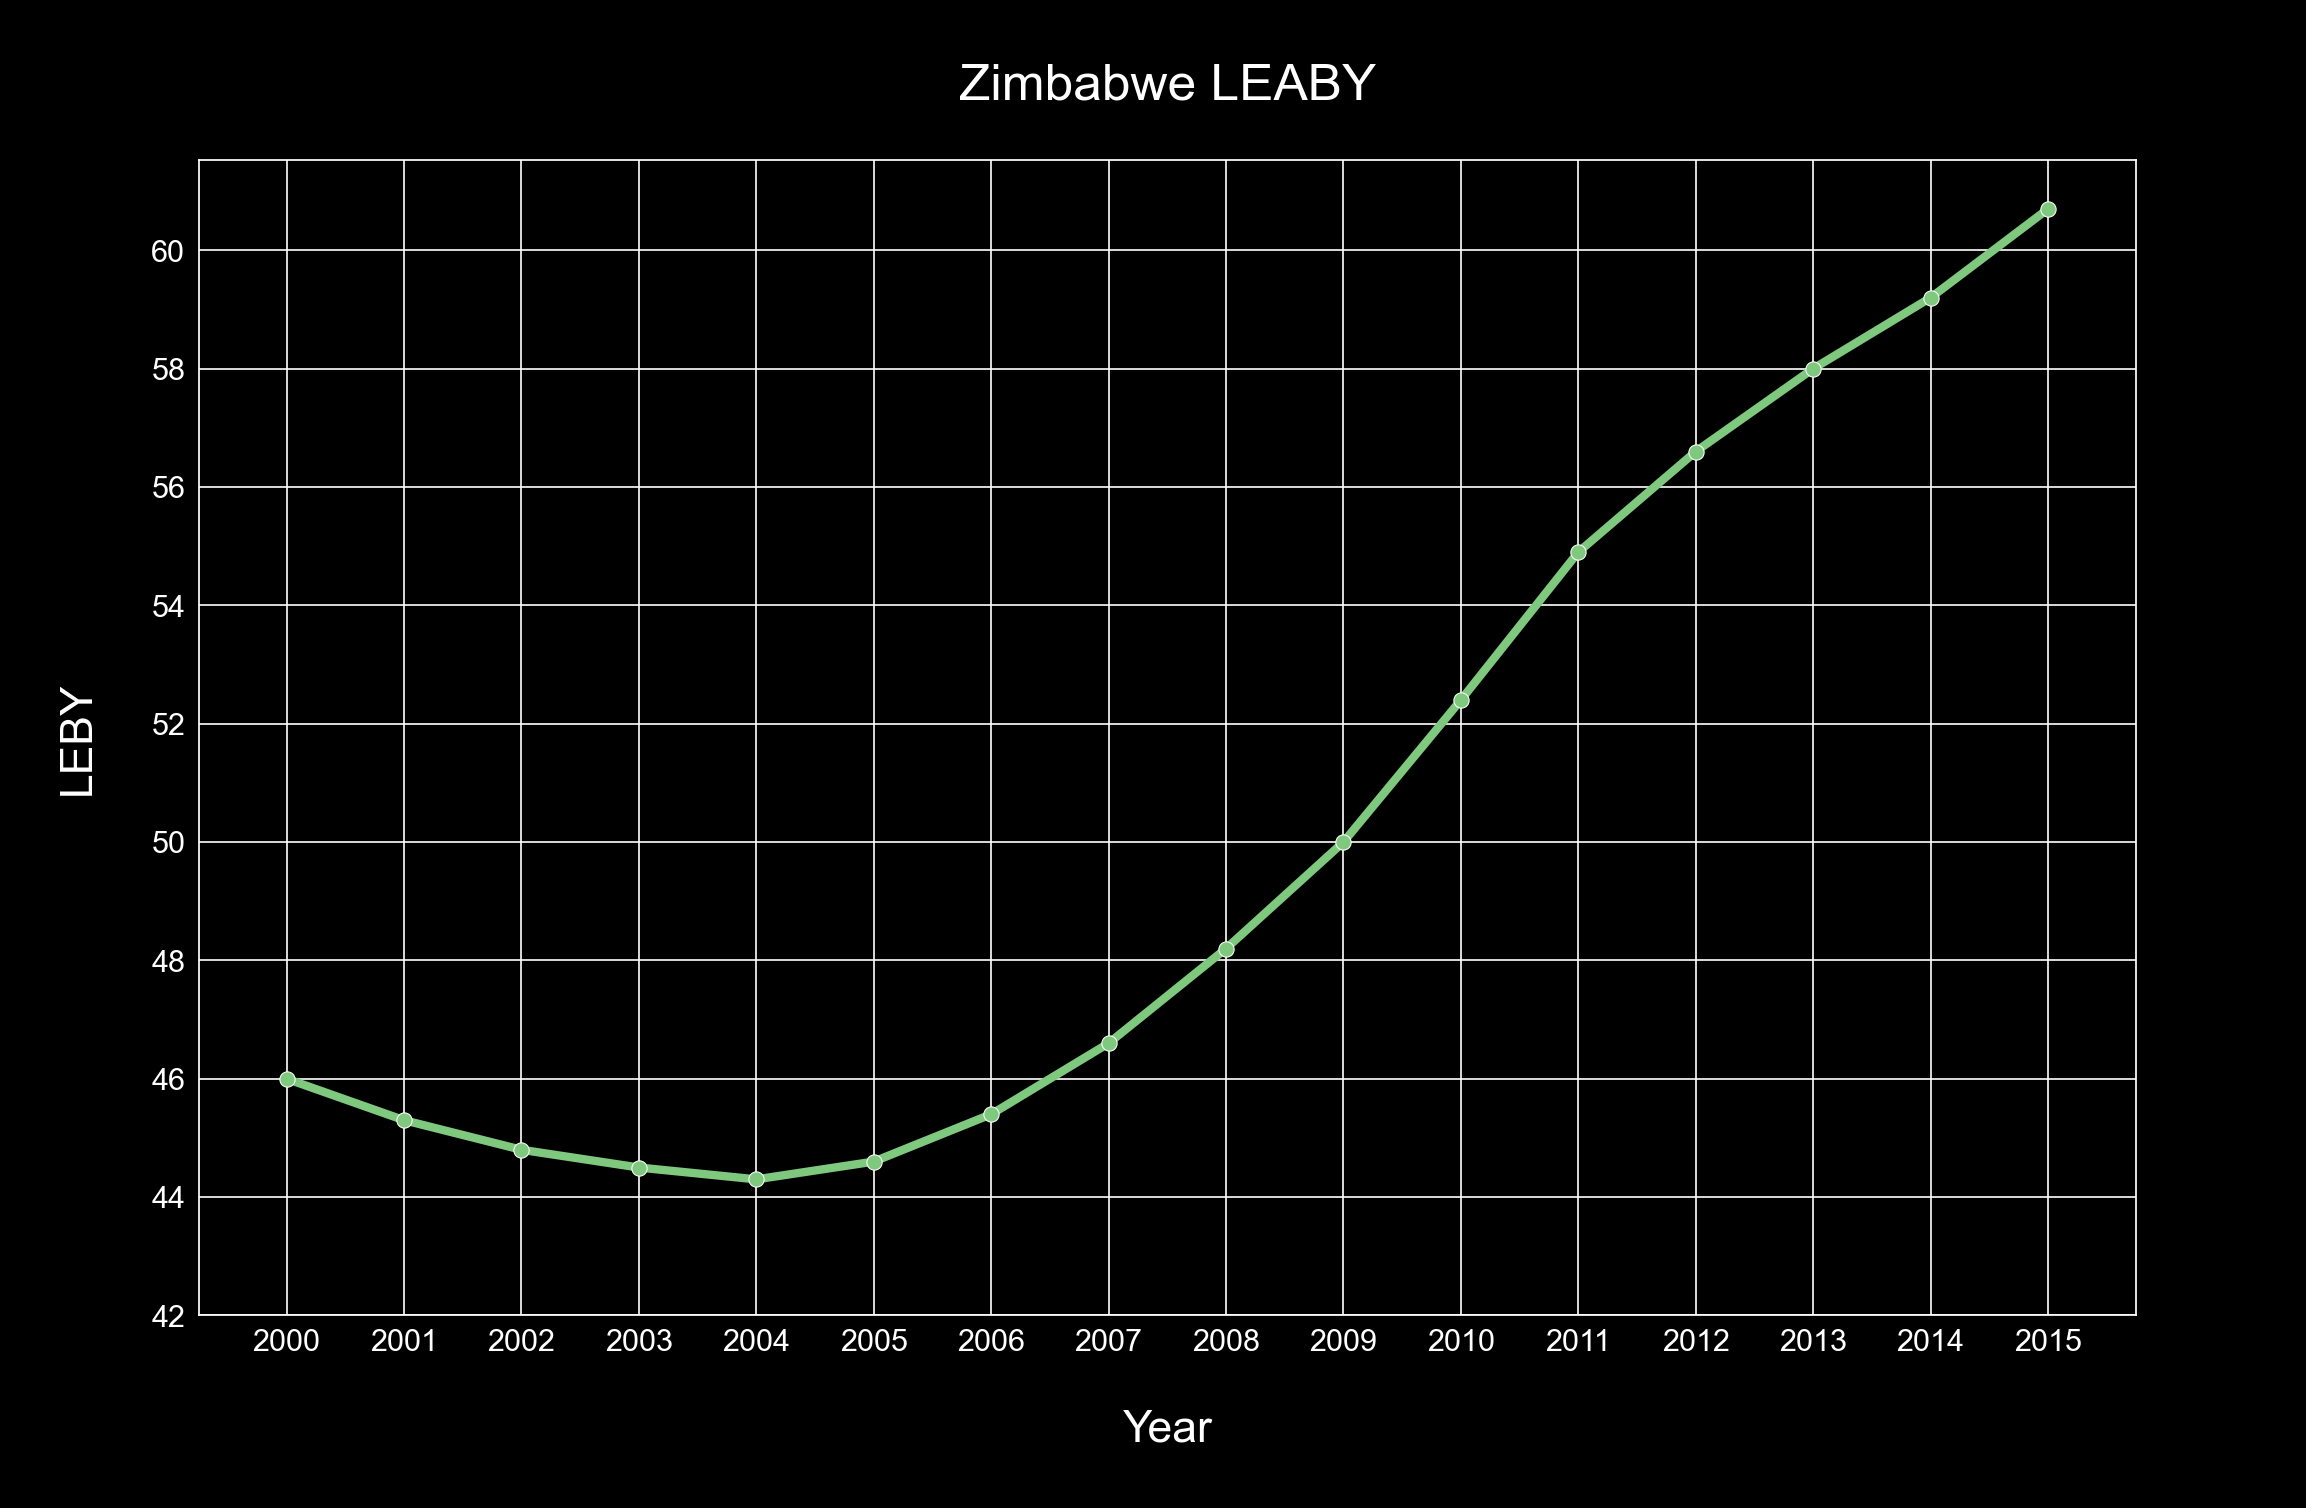

In [44]:
# Set style
sns.set_style('darkgrid', {'axes.facecolor':'black', 'figure.facecolor':'black'})

# Create figure 
plt.figure(figsize=(25, 15))

# Use Seaborn to create the bar plot
sns.set_context( rc={'grid.linewidth': 1.2, 'lines.linewidth': 6, 'lines.markersize': 11})
ax = sns.lineplot(data=df_zimbabwe, x='Year', y='LEABY', marker='o', 
                  ci=None)

# Setting x ticks to a years list
years = df_zimbabwe.Year.values
ax.tick_params(axis='both', colors='white', labelsize=22)
ax.set_xticks(years)
ax.set_yticks(range(42, 62, 2))

# Add a title 
ax.set_title('\nZimbabwe LEABY\n', fontsize=37, color='white')


# Label x and y axes 
ax.set_xlabel('\nYear\n', fontsize=32, color='white')
ax.set_ylabel('\nLEBY\n', fontsize=32, color='white')

# place an empty text box in the upper left axes coords, to match to the figure right padding  
ax.text(1.08, 1, ' ', transform=ax.transAxes, bbox=dict(facecolor='black', edgecolor='black'))

# Note: save figure before using show(), if not the result is a blank image
# also savefig overrides the facecolor for the background of the figure, need to save fg with .get_facecolor()
plt.savefig('year_leaby_zimbabwe_linechart.png', facecolor=ax.get_facecolor())
plt.show()

# Restore all to default settings
sns.reset_defaults()
plt.close()


Step 8. Scatter Plots of GDP and Life Expectancy Data

To create a visualization that will make it easier to see the possible correlation between GDP and life expectancy, you can plot each set of data on its own subplot, on a shared figure.

Create a multiple plots for comparison, using FacetGrid.

    In this graph, we want GDP on the X axis and Life Expectancy on the Y axis.
    We want the columns to be split up for every Year in the data
    We want the data points to be differentiated (hue) by Country.
    We want to use a Matplotlib scatter plot to visualize the different graphs



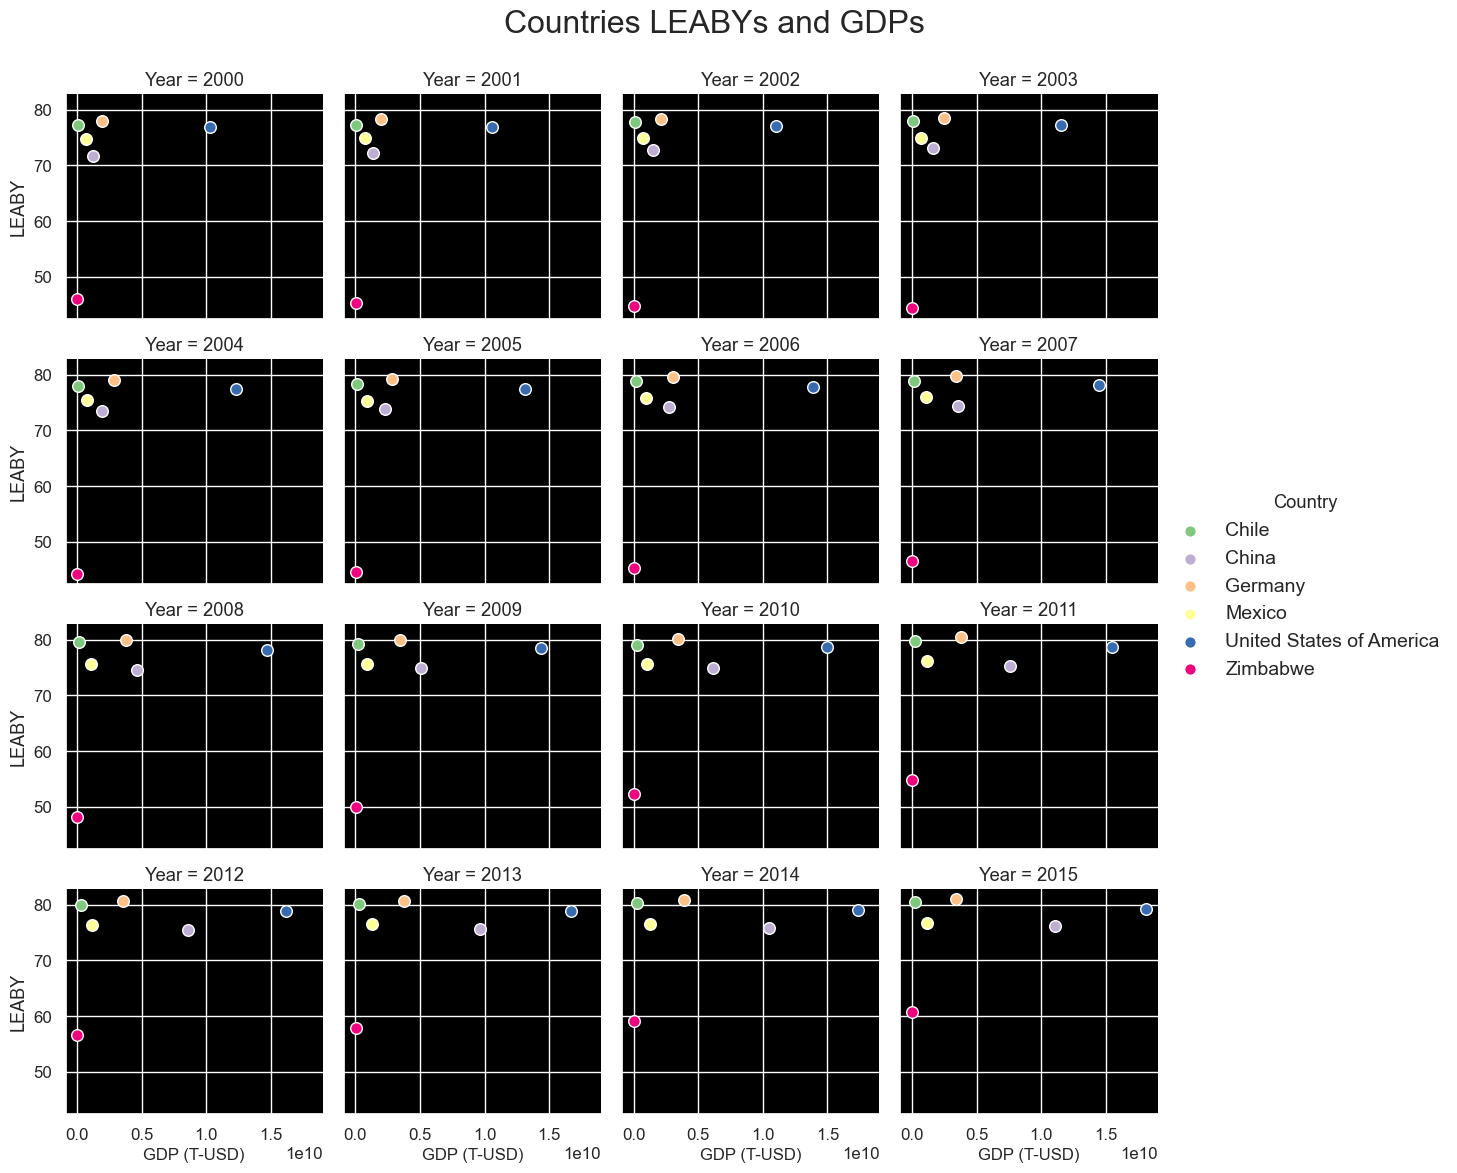

In [47]:
# Personal preferences font scale
sns.set(font_scale=1.1)

# Set style and color palette
sns.set_style('darkgrid', {'axes.facecolor':'black'})
sns.set_palette('Accent')

# grid
# gdp in Trillion
df.GDP=df.GDP*1e-3
g = sns.FacetGrid(data=df, col='Year', hue='Country', col_wrap=4)
g = g.map(plt.scatter, 'GDP', 'LEABY', edgecolor='w', s=70).add_legend(fontsize=14)
# gdp in million personel preference
df.GDP=df.GDP*1e+3

# Personal preferences x and y labels
g.set_xlabels('GDP (T-USD)', fontsize=12)
g.set_ylabels('LEABY', fontsize=13)

# Add a Title to the grid
plt.subplots_adjust(top=0.91)
g.fig.suptitle('Countries LEABYs and GDPs', fontsize=23) 

# Note: save figure before using show(), if not the result is a blank image
plt.savefig('gdp_leaby_facetgrid_scatter.png')
plt.show()

# Restore all to default settings
sns.reset_defaults()
plt.close()


Step 9. Line Plots for Life Expectancy

In the scatter plot grid above, it was hard to isolate the change for GDP and Life expectancy over time. It would be better illustrated with a line graph for each GDP and Life Expectancy by country.

FacetGrid also allows you to do that! Instead of passing in plt.scatter as your Matplotlib function, you would have to pass in plt.plot to see a line graph.

Here are the instructors to fill in the blanks from the commented word bank:

    In this graph, we want Years on the X axis and Life Expectancy on the Y axis.
    We want the columns to be split up by Country
    We want to use a Matplotlib line plot to visualize the different graphs



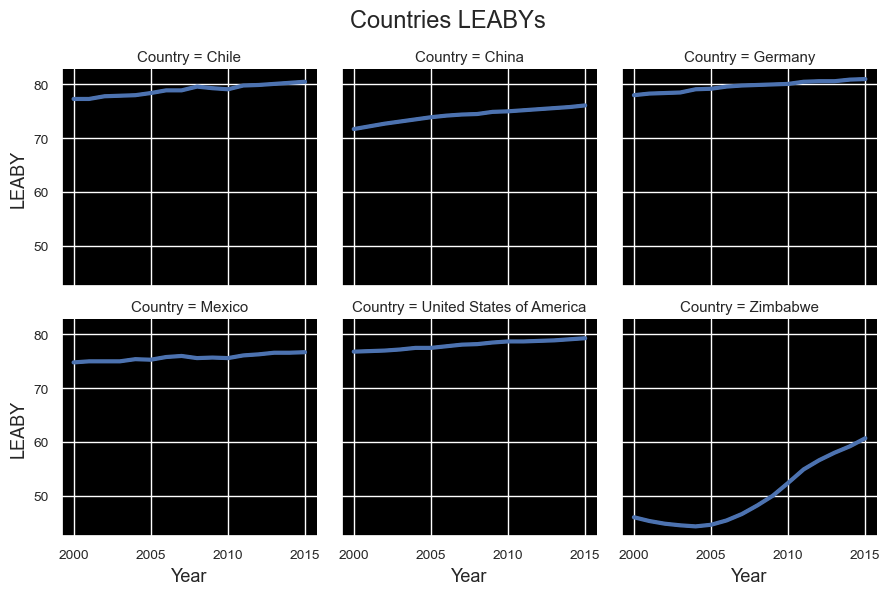

In [49]:
# Personal preferences font scale
sns.set(font_scale=.9)

# Set style and color palette
sns.set_style('darkgrid', {'axes.facecolor': 'black'})

# grid Chart
g = sns.FacetGrid(data=df, col='Country', col_wrap=3)
g = g.map(plt.plot, 'Year', 'LEABY')

# assign line color to corresponding country
for i in range(6):
    ax = g.facet_axis(0,i) # could also do ax=g.axes[0,0]
    # get the relevant Line2D object 
    l = ax.get_lines()[0] 
    l.set_linewidth(3)
    # Add white border to line
    l.set_path_effects([path_effects.Stroke(linewidth=2, foreground='white'), path_effects.Normal()])

# Personal preferences x and y labels
g.set_xlabels('Year', fontsize=13)
g.set_ylabels('LEABY', fontsize=13)

# Add a Title to the grid
plt.subplots_adjust(top=0.88)
g.fig.suptitle('Countries LEABYs', fontsize=17) 

# Note: save figure before using show(), if not the result is a blank image
plt.savefig('leaby_facetgrid_line.png')
plt.show()

# Restore all to default settings
sns.reset_defaults()
plt.close()


Step 10. Line Plots for GDP

Let's recreate the same FacetGrid for GDP now. Instead of Life Expectancy on the Y axis, we now we want GDP.

Once you complete and successfully run the code above, copy and paste it into the cell below. Change the variable for the X axis. Change the color on your own! Be sure to show your plot.


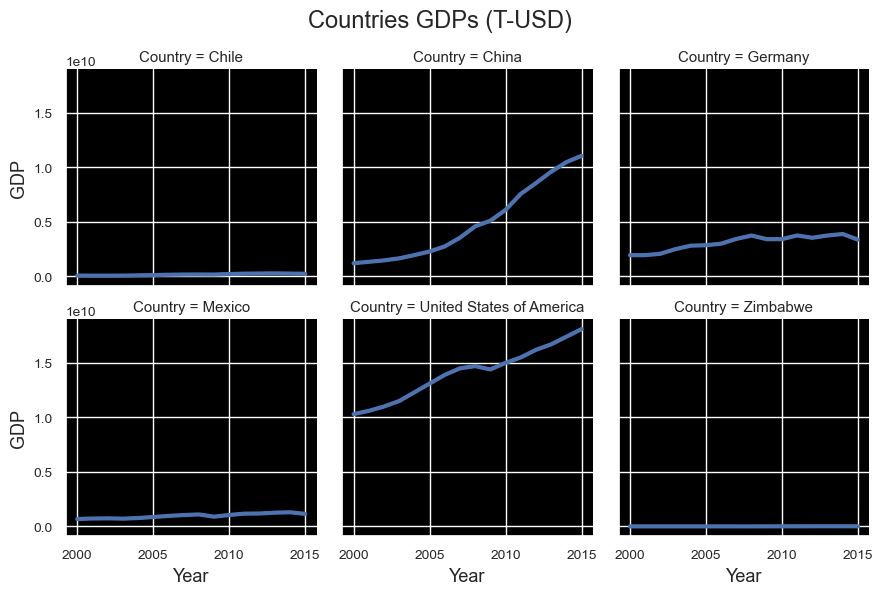

In [54]:
# Personal preferences font scale
sns.set(font_scale=.9)

# Set style and color palette
sns.set_style('darkgrid', {'axes.facecolor': 'black'})

# grid Chart
# gdp in Trillions
df.GDP=df.GDP*1e-3
g = sns.FacetGrid(data=df, col='Country', col_wrap=3)
g = g.map(plt.plot, 'Year', 'GDP')
# gdp in Billions personel preference
df.GDP=df.GDP*1e+3

# assign line color to corresponding country
for i in range(6):
    ax = g.facet_axis(0,i) # could also do ax=g.axes[0,0]
    # get the relevant Line2D object 
    l = ax.get_lines()[0] 
    l.set_linewidth(3)
    # Add white border to line
    l.set_path_effects([path_effects.Stroke(linewidth=2, foreground='white'), path_effects.Normal()])


# Personal preferences x and y labels
g.set_xlabels('Year', fontsize=13)
g.set_ylabels('GDP', fontsize=13)

# Add a Title to the grid
plt.subplots_adjust(top=0.88)
g.fig.suptitle('Countries GDPs (T-USD)', fontsize=17) 

# Note: save figure before using show(), if not the result is a blank image
plt.savefig('GDPt_facetgrid_line.png')
plt.show()

# Restore all to default settings
sns.reset_defaults()
plt.close()

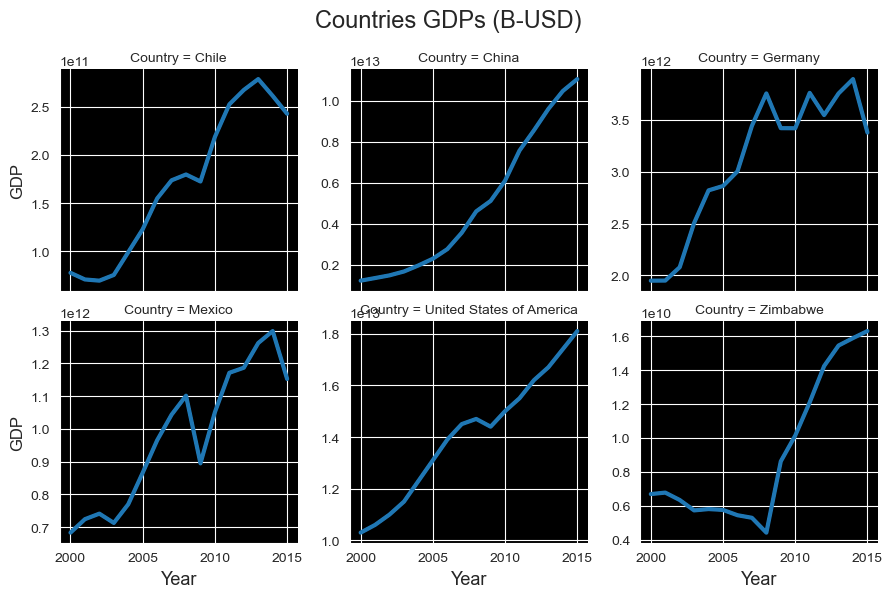

In [55]:
# Set style and color palette
sns.set_style('darkgrid', {'axes.facecolor': 'black'})

# grid Chart
# adding the argument sharey = False to .FacetGrid() scales each the Y axes to the each country data
g = sns.FacetGrid(data=df, col='Country', col_wrap=3, sharey = False)
g = g.map(plt.plot, 'Year', 'GDP')

# assigne line color to corresponding country
for i in range(6):
    ax = g.facet_axis(0,i) # could also do ax=g.axes[0,0]
    # get the relevant Line2D object 
    l = ax.get_lines()[0] 
    l.set_linewidth(3)
    # Add white border to line
    l.set_path_effects([path_effects.Stroke(linewidth=2, foreground='white'), path_effects.Normal()])

# Personal preferences x and y labels
g.set_xlabels('Year', fontsize=13)
g.set_ylabels('GDP', fontsize=12)

# Add a Title to the grid
plt.subplots_adjust(top=0.88)
g.fig.suptitle('Countries GDPs (B-USD)', fontsize=17) 

# Note: save figure before using show(), if not the result is a blank image
plt.savefig('GDPb_facetgrid_line.png')
plt.show()

# Restore all to default settings
sns.reset_defaults()
plt.close()

